In [37]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.preprocessing import PolynomialFeatures

In [ ]:
from google.colab import drive
drive.mount('./drive')

Mounted at ./drive


In [ ]:
dir = '/content/drive/MyDrive/Assignment_HOOM/'

In [4]:
df = pd.read_csv('supply_dataset_final.csv').set_index('DATE')
df

,PERMIT,HOUSE_SUPPLY,HOUST,CON_SPENDING,PRICE,HOUSE_SOLD
DATE,,,,,,
2002-01-01,1665.0,4.2,1698.0,382979,117.143,880.0
2002-02-01,1787.0,4.0,1829.0,391434,117.844,948.0
2002-03-01,1691.0,4.1,1642.0,390942,118.687,923.0
2002-04-01,1669.0,4.3,1592.0,404255,119.611,936.0
2002-05-01,1716.0,4.0,1764.0,399164,120.724,978.0
...,...,...,...,...,...,...
2022-02-01,1857.0,6.0,1777.0,912047,290.371,790.0
2022-03-01,1879.0,7.0,1716.0,929023,296.362,707.0
2022-04-01,1823.0,8.4,1805.0,940598,301.409,619.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 2002-01-01 to 2022-06-01
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PERMIT        244 non-null    float64
 1   HOUSE_SUPPLY  244 non-null    float64
 2   HOUST         244 non-null    float64
 3   CON_SPENDING  244 non-null    int64  
 4   PRICE         244 non-null    float64
 5   HOUSE_SOLD    244 non-null    float64
dtypes: float64(5), int64(1)
memory usage: 13.3+ KB


In [6]:
df.describe()

,PERMIT,HOUSE_SUPPLY,HOUST,CON_SPENDING,PRICE,HOUSE_SOLD
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,1330.389344,5.909016,1272.245902,477678.315574,175.076754,685.987705
std,479.246597,1.831211,463.383145,163410.528859,38.165417,297.779526
min,513.000000,3.300000,478.000000,244399.000000,117.143000,270.000000
25%,1001.500000,4.500000,928.750000,360029.750000,146.398500,439.500000
50%,1302.000000,5.400000,1224.500000,475046.500000,169.579500,619.000000
75%,1729.250000,6.700000,1648.250000,571378.250000,189.920000,936.000000
max,2263.000000,11.400000,2273.000000,954475.000000,306.181000,1389.000000


In [7]:
normalized_df=(df-df.min())/(df.max()-df.min())
normalized_df

,PERMIT,HOUSE_SUPPLY,HOUST,CON_SPENDING,PRICE,HOUSE_SOLD
DATE,,,,,,
2002-01-01,0.658286,0.111111,0.679666,0.195162,0.000000,0.545130
2002-02-01,0.728000,0.086420,0.752646,0.207069,0.003708,0.605898
2002-03-01,0.673143,0.098765,0.648468,0.206377,0.008168,0.583557
2002-04-01,0.660571,0.123457,0.620613,0.225125,0.013056,0.595174
2002-05-01,0.687429,0.086420,0.716435,0.217956,0.018943,0.632708
...,...,...,...,...,...,...
2022-02-01,0.768000,0.333333,0.723677,0.940249,0.916366,0.464701
2022-03-01,0.780571,0.456790,0.689694,0.964156,0.948058,0.390527
2022-04-01,0.748571,0.629630,0.739276,0.980457,0.974756,0.311886


In [8]:
normalized_df.describe()

,PERMIT,HOUSE_SUPPLY,HOUST,CON_SPENDING,PRICE,HOUSE_SOLD
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,0.467080,0.322101,0.442477,0.328527,0.306466,0.371750
std,0.273855,0.226075,0.258152,0.230131,0.201893,0.266112
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.279143,0.148148,0.251114,0.162843,0.154760,0.151475
50%,0.450857,0.259259,0.415877,0.324821,0.277386,0.311886
75%,0.695000,0.419753,0.651950,0.460485,0.384986,0.595174
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


GDPC1      89 non-null     float64
 1   UNRATE     89 non-null     float64
 2   DEXUSEU    89 non-null     float64
 3   MORTGAGE   89 non-null     float64
 4   CSUSHPISA  89 non-null     float64

In [9]:
columns = list(normalized_df.columns).remove('PRICE')
normalized_df.pivot_table(columns, ['PRICE'], aggfunc=np.median)

,CON_SPENDING,HOUSE_SOLD,HOUSE_SUPPLY,HOUST,PERMIT
PRICE,,,,,
0.000000,0.195162,0.545130,0.111111,0.679666,0.658286
0.003708,0.207069,0.605898,0.086420,0.752646,0.728000
0.008168,0.206377,0.583557,0.098765,0.648468,0.673143
0.013056,0.225125,0.595174,0.123457,0.620613,0.660571
0.018943,0.217956,0.632708,0.086420,0.716435,0.687429
...,...,...,...,...,...
0.916366,0.940249,0.464701,0.333333,0.723677,0.768000
0.948058,0.964156,0.390527,0.456790,0.689694,0.780571
0.974756,0.980457,0.311886,0.629630,0.739276,0.748571


In [10]:
normalized_df.corr()

,PERMIT,HOUSE_SUPPLY,HOUST,CON_SPENDING,PRICE,HOUSE_SOLD
PERMIT,1.000000,-0.510994,0.986760,0.744533,0.296055,0.940021
HOUSE_SUPPLY,-0.510994,1.000000,-0.493203,-0.209657,0.082918,-0.479364
HOUST,0.986760,-0.493203,1.000000,0.715317,0.257409,0.941549
CON_SPENDING,0.744533,-0.209657,0.715317,1.000000,0.848935,0.577179
PRICE,0.296055,0.082918,0.257409,0.848935,1.000000,0.093046
HOUSE_SOLD,0.940021,-0.479364,0.941549,0.577179,0.093046,1.000000


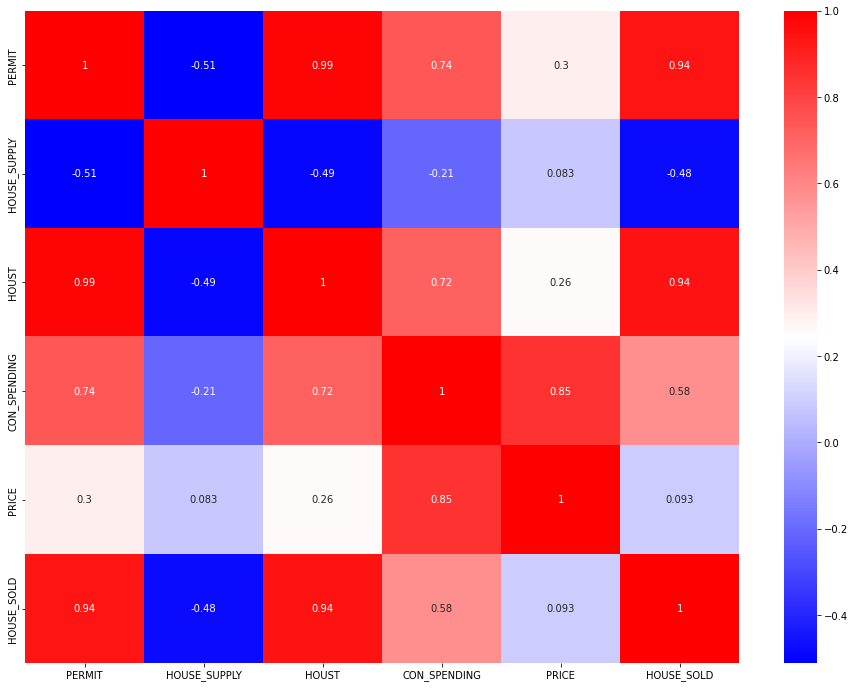

In [11]:
plt.figure(figsize=(16, 12))
sns.heatmap(normalized_df.corr(), cmap='bwr', annot=True)

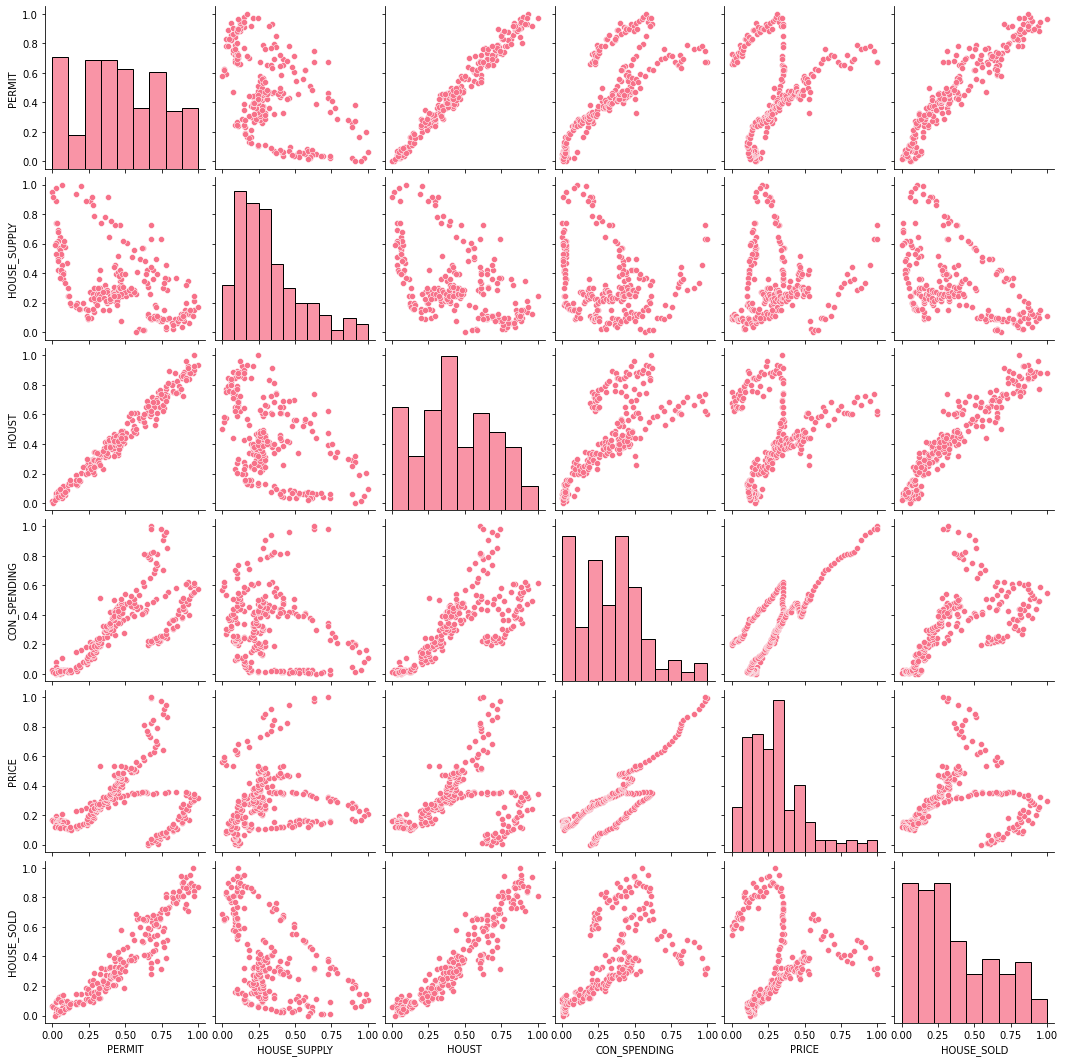

In [12]:
sns.pairplot(normalized_df)

In [13]:
X = normalized_df.drop(['PRICE'], axis=1)
y = normalized_df['PRICE']
print('X shape : ', X.shape, '\ty shape : ',y.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
print('X_train : ', X_train.shape, '\ty_train : ', y_train.shape, '\nX_test : ', X_test.shape, '\ty_train : ', y_test.shape)

X shape :  (244, 5) 	y shape :  (244,)
X_train :  (195, 5) 	y_train :  (195,) 
X_test :  (49, 5) 	y_train :  (49,)


In [14]:
models = pd.DataFrame(columns=["Model","MAE","MSE","RMSE","R2 Score"])
scores = pd.DataFrame(columns=["Model","Training Score","Testing Score"])

In [15]:
def evaluation(y, predictions):
    mae = mean_absolute_error(y, predictions)
    mse = mean_squared_error(y, predictions)
    rmse = np.sqrt(mean_squared_error(y, predictions))
    r_squared = r2_score(y, predictions)
    return mae, mse, rmse, r_squared

### Random Forest Regressor

In [17]:
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 7, random_state = 18)
random_forest.fit(X_train, y_train)
predictions = random_forest.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "RandomForestRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.021775073351945406
MSE: 0.001177514087878463
RMSE: 0.03431492514749905
R2 Score: 0.9697883537248667
------------------------------


In [18]:
training = random_forest.score(X_train, y_train)
testing = random_forest.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "RandomForestRegressor","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9924164968585993
Testing: 0.9697883537248667


### Gradient Boosting Regressor

In [23]:
from sklearn.ensemble import GradientBoostingRegressor

Model_=GradientBoostingRegressor(max_depth=7,max_features=5,n_estimators=300,random_state=18).fit(X_train,y_train)
print('Train mse:',mean_squared_error(y_train,Model_.predict(X_train)))

predictions = Model_.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "GradientBoostingRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

Train mse: 3.26001899177333e-14
MAE: 0.0175183402627074
MSE: 0.0008488967232314162
RMSE: 0.02913583229000703
R2 Score: 0.9782197361454971
------------------------------


In [24]:
training = Model_.score(X_train, y_train)
testing = Model_.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "GradientBoostingRegressor","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999992049
Testing: 0.9782197361454971


### Linear Regression

In [25]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
predictions = lin_reg.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "LinearRegression","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.024241328261050334
MSE: 0.0009793112776185088
RMSE: 0.03129394953690743
R2 Score: 0.9748736713919358
------------------------------


In [26]:
raining = lin_reg.score(X_train, y_train)
testing = lin_reg.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "LinearRegression","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999992049
Testing: 0.9748736713919358


### Ridge Regression

### SVR

In [38]:
svr = SVR()
svr.fit(X_train, y_train)
predictions = svr.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "SVR","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.05767624856186765
MSE: 0.0045759643759709055
RMSE: 0.0676458747890136
R2 Score: 0.8825938317701781
------------------------------


In [28]:
raining = svr.score(X_train, y_train)
testing = svr.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "SVR","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999992049
Testing: 0.8825938317701781


### Polynomial Regression

In [29]:
poly_reg = PolynomialFeatures(degree=2)
X_train_2d = poly_reg.fit_transform(X_train)
X_test_2d = poly_reg.transform(X_test)

lin_reg = LinearRegression()
lin_reg.fit(X_train_2d, y_train)
predictions = lin_reg.predict(X_test_2d)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "Polynomial (degree=2)","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

MAE: 0.01917600250169188
MSE: 0.0006186826672200345
RMSE: 0.024873332451041508
R2 Score: 0.9841263708935456
------------------------------


In [30]:
raining = lin_reg.score(X_train_2d, y_train)
testing = lin_reg.score(X_test_2d, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "Polynomial Regression","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999992049
Testing: 0.9841263708935456


### XGB Regressor

In [31]:
xgb = XGBRegressor(n_estimators=1000, learning_rate=0.01)
xgb.fit(X_train, y_train)
predictions = xgb.predict(X_test)

mae, mse, rmse, r_squared = evaluation(y_test, predictions)
print("MAE:", mae)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r_squared)
print("-"*30)

new_row = {"Model": "XGBRegressor","MAE": mae, "MSE": mse, "RMSE": rmse, "R2 Score": r_squared}
models = models.append(new_row, ignore_index=True)

[22:38:08] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
MAE: 0.022780119088882035
MSE: 0.0010116562550504856
RMSE: 0.03180654421735385
R2 Score: 0.9740437917098059
------------------------------


In [32]:
raining = xgb.score(X_train, y_train)
testing = xgb.score(X_test, y_test)
print("Training:", training)
print("Testing:", testing)
new_score = {"Model": "XGB","Training Score": training,"Testing Score": testing}
scores = scores.append(new_score, ignore_index = True)

Training: 0.9999999999992049
Testing: 0.9740437917098059


In [33]:
models.sort_values(by="RMSE")

,Model,MAE,MSE,RMSE,R2 Score
6,Polynomial (degree=2),0.019176,0.000619,0.024873,0.984126
3,GradientBoostingRegressor,0.017518,0.000849,0.029136,0.978220
4,LinearRegression,0.024241,0.000979,0.031294,0.974874
1,GradientBoostingRegressor,0.018467,0.000983,0.031360,0.974768
2,GradientBoostingRegressor,0.018467,0.000983,0.031360,0.974768
7,XGBRegressor,0.022780,0.001012,0.031807,0.974044
0,RandomForestRegressor,0.021775,0.001178,0.034315,0.969788
5,SVR,0.057676,0.004576,0.067646,0.882594


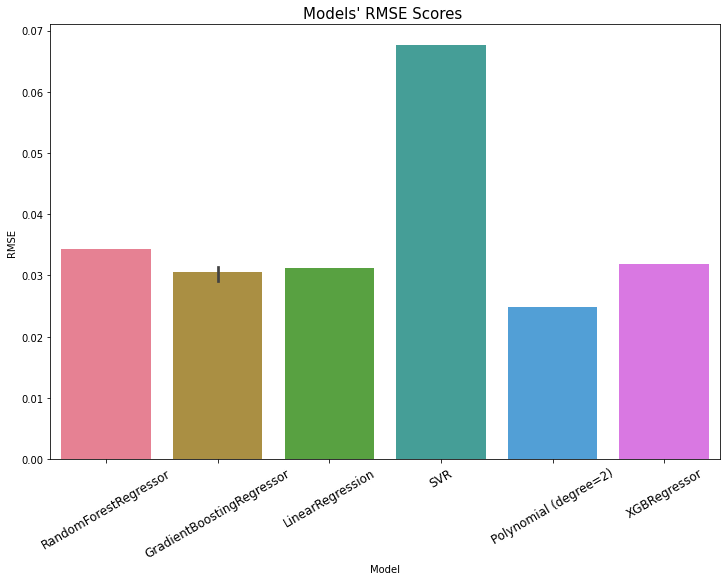

In [34]:
plt.figure(figsize=(12,8))
sns.barplot(x=models["Model"], y=models["RMSE"])
plt.title("Models' RMSE Scores ", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

In [35]:
scores.sort_values(by="Testing Score")

,Model,Training Score,Testing Score
5,SVR,1.000000,0.882594
0,RandomForestRegressor,0.992416,0.969788
7,XGB,1.000000,0.974044
1,GradientBoostingRegressor,1.000000,0.974768
2,GradientBoostingRegressor,1.000000,0.974768
4,LinearRegression,1.000000,0.974874
3,GradientBoostingRegressor,1.000000,0.978220
6,Polynomial Regression,1.000000,0.984126


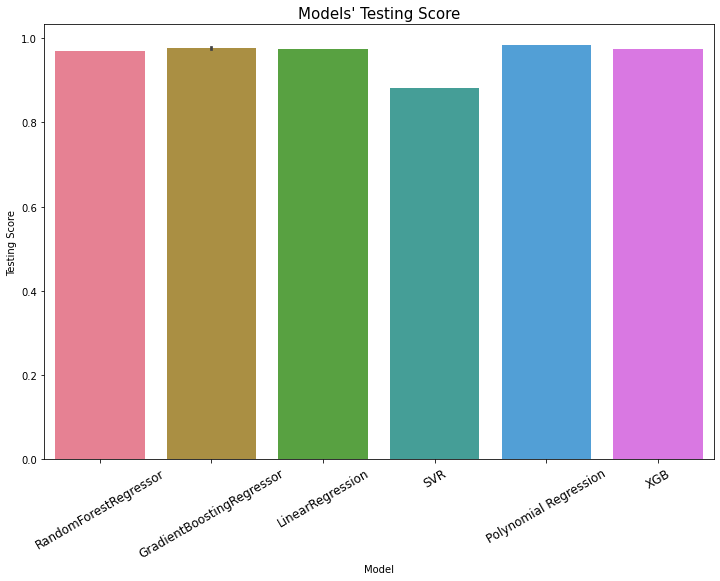

In [36]:
plt.figure(figsize=(12,8))
sns.barplot(x=scores["Model"], y=scores["Testing Score"])
plt.title("Models' Testing Score", size=15)
plt.xticks(rotation=30, size=12)
plt.show()

## Conclusion

Since Polynomial Regression has lowest error rate and highest testing accuracy, it was chosen as a final model of the Supply data.